<a href="https://colab.research.google.com/github/ZinaTlish/DZ-DA/blob/main/%D0%94%D0%971%D0%90%D0%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy.core.fromnumeric import shape
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.fft import fft, fftfreq
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/drive
Mounted at /content/gdrive


In [ ]:
data = pd.read_csv(
    '/content/gdrive/MyDrive/all.csv',
    sep=';')
data.head()

,Дата,Заражений за день,Выздоровлений за день,Смертей за день
0,2020-03-12 00:00:00,34,0,0
1,2020-03-13 00:00:00,11,0,0
2,2020-03-14 00:00:00,14,0,0
3,2020-03-15 00:00:00,4,3,0
4,2020-03-16 00:00:00,28,2,0


In [ ]:
df = pd.DataFrame(data)
df.drop(['Выздоровлений за день', 'Смертей за день'], axis=1)

,Дата,Заражений за день
0,2020-03-12 00:00:00,34
1,2020-03-13 00:00:00,11
2,2020-03-14 00:00:00,14
3,2020-03-15 00:00:00,4
4,2020-03-16 00:00:00,28
...,...,...
1033,2023-01-09 00:00:00,2754
1034,2023-01-10 00:00:00,3032
1035,2023-01-11 00:00:00,4201
1036,2023-01-12 00:00:00,4675


In [ ]:
data['Дата'] = pd.to_datetime(data['Дата'])
data.sort_values(by='Дата', inplace=True)
data['Процентный прирост'] = data['Заражений за день'].pct_change() * 100

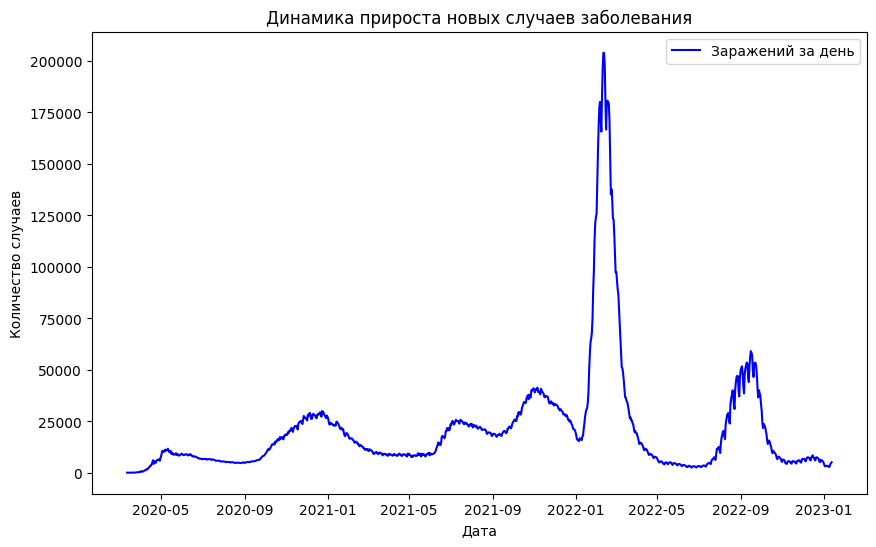

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Дата'], data['Заражений за день'], label='Заражений за день', color='blue')
plt.xlabel('Дата')
plt.ylabel('Количество случаев')
plt.title('Динамика прироста новых случаев заболевания')
plt.legend()
plt.show()

In [ ]:
from scipy.fft import fft, fftfreq

Text(0, 0.5, 'Амплитуда')

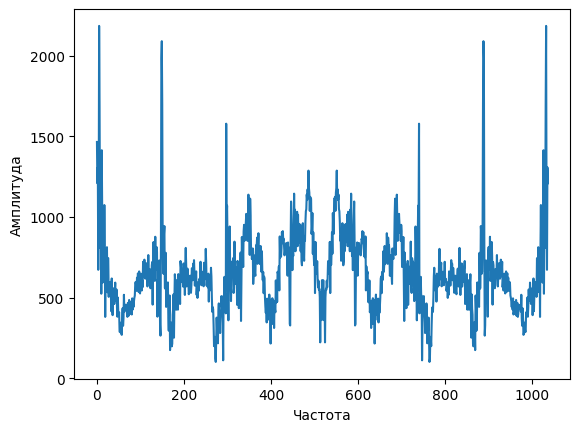

In [ ]:
data = data.dropna()
# Применение преобразования Фурье
N = len(data['Процентный прирост'])
T = 1  # Период времени между измерениями в днях
yf = fft(data['Процентный прирост'].values)
xf = fftfreq(N, T)[:N//2]
plt.plot(np.abs(yf))
plt.xlabel('Частота')
plt.ylabel('Амплитуда')

In [ ]:
max_ampl = np.argmax(yf[:N//2])

# Вычисляем период
period = 1 / xf[max_ampl]
print("Перид прироста:", period, "дней")

Перид прироста: 207.4 дней


<ipython-input-53-730cda5d1c5c>:3: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/xf[:N//2], 2.0/N * np.abs(yf[:N//2]))


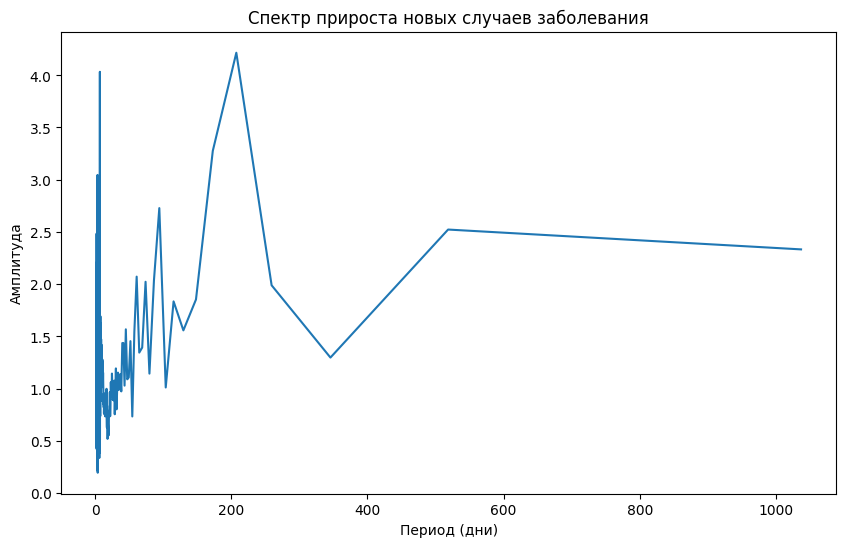

In [ ]:
# Построение графика спектра
plt.figure(figsize=(10, 6))
plt.plot(1/xf[:N//2], 2.0/N * np.abs(yf[:N//2]))
plt.xlabel('Период (дни)')
plt.ylabel('Амплитуда')
plt.title('Спектр прироста новых случаев заболевания')
plt.show()

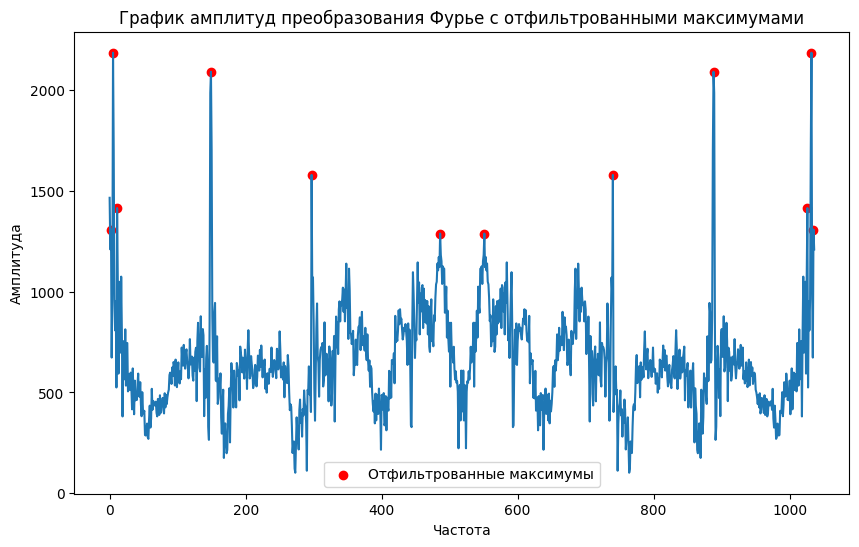

Даты, соответствующие отфильтрованным максимумам:
3      2020-03-15
6      2020-03-18
12     2020-03-24
150    2020-08-09
298    2021-01-04
487    2021-07-12
552    2021-09-15
741    2022-03-23
889    2022-08-18
1027   2023-01-03
1033   2023-01-09
1036   2023-01-12
Name: Дата, dtype: datetime64[ns]


In [ ]:
local_maxima = (np.diff(np.sign(np.diff(np.abs(yf)))) < 0).nonzero()[0] + 1
selected_maxima = local_maxima[np.abs(yf[local_maxima]) > 1250]
dates_of_selected_maxima = data['Дата'].iloc[selected_maxima]
plt.figure(figsize=(10, 6))
plt.plot(np.abs(yf))
plt.scatter(selected_maxima, np.abs(yf[selected_maxima]), color='red', label='Отфильтрованные максимумы')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.title('График амплитуд преобразования Фурье с отфильтрованными максимумами')
plt.legend()
plt.show()
print("Даты, соответствующие отфильтрованным максимумам:")
print(dates_of_selected_maxima)

